# Assignment 1

By Group 66:

-   Aleksandar Lukic - s194066
-   Paula Barho - s242926
-   Victor Gustav Harbo Rasmussen - s204475
   
**For this assignment, the exercise text is included in <span style="color:DodgerBlue">blue</span> color**

<span style="color:DodgerBlue">

## Part 1

> From week 1's exercise, I'd like you to complete the "Exercise 3: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.
> 
> **IMPORTANT:** FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.
>
</span>

First, we do our imports

In [18]:
# Imports for part 1 
import matplotlib.pyplot as plt
import pandas as pd
import os

Then we load our data and filter out the 10 focus crimes:

In [19]:
# Loading the data 
data_path = os.path.abspath(os.path.join(os.pardir, "data"))
cleaned_data_path = os.path.join(data_path, "Police_Department_Incident_Reports_Complete.csv")
df = pd.read_csv(cleaned_data_path)

# Define focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
                   'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# Filter data for focus crimes
df_focus = df[df['Category'].isin(focuscrimes)]

<span style="color:DodgerBlue">

Let's count the number of crimes per year:
> - What is the year with most crimes?
> - What is the year with the fewest crimes?.

</span>

In [ ]:
# Grouping by year and counting the number of crimes
yearly_crime_counts = df_focus['Year'].value_counts()

# Finding the year with the most crimes
year_most_crimes = yearly_crime_counts.idxmax()
most_crimes = yearly_crime_counts.max()

# Finding the year with the fewest crimes
year_fewest_crimes = yearly_crime_counts.idxmin()
fewest_crimes = yearly_crime_counts.min()

print(f"The year with the most focus crimes is {year_most_crimes} with {most_crimes} crimes.")
print(f"The year with the fewest focus crimes is {year_fewest_crimes} with {fewest_crimes} crimes.")

The year with the most focus crimes is 2017 with 90058 crimes.
The year with the fewest focus crimes is 2024 with 62754 crimes.


<span style="color:DodgerBlue">

> Create a barplot of crimes-per-year (years on the x-axis, crime-counts on the y-axis).

</span>

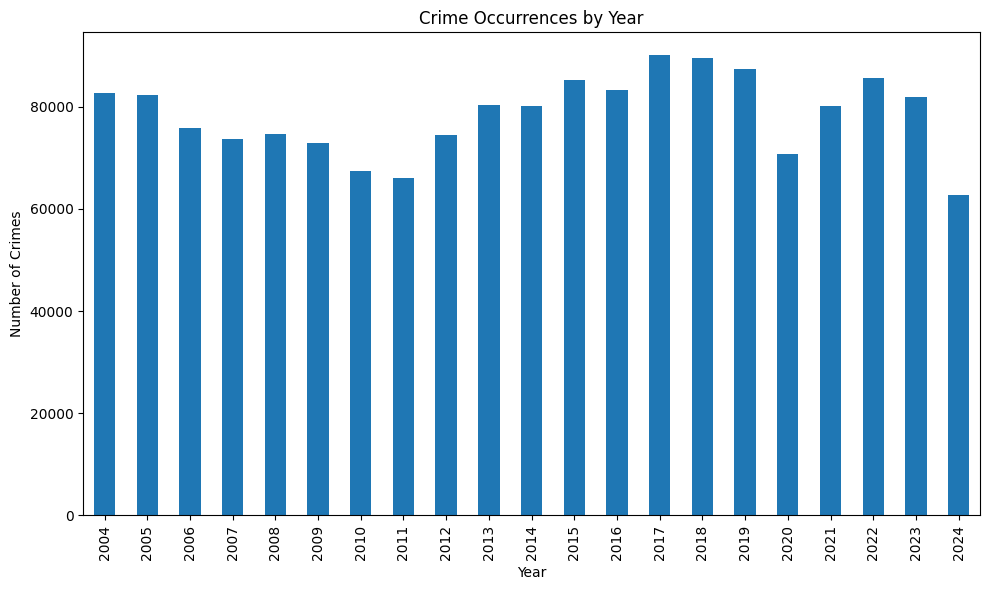

In [21]:
# Group by year and count the number of crimes, then sort by year
yearly_crime_counts = df_focus['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
yearly_crime_counts.plot(kind='bar')

# Add title and labels
plt.title('Crime Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Show the plot
plt.tight_layout()
plt.show()

<span style="color:DodgerBlue">

> Create bar-charts displaying the year-by-year development of each of the focus crime categories across the years 2003-2025.
>
</span>

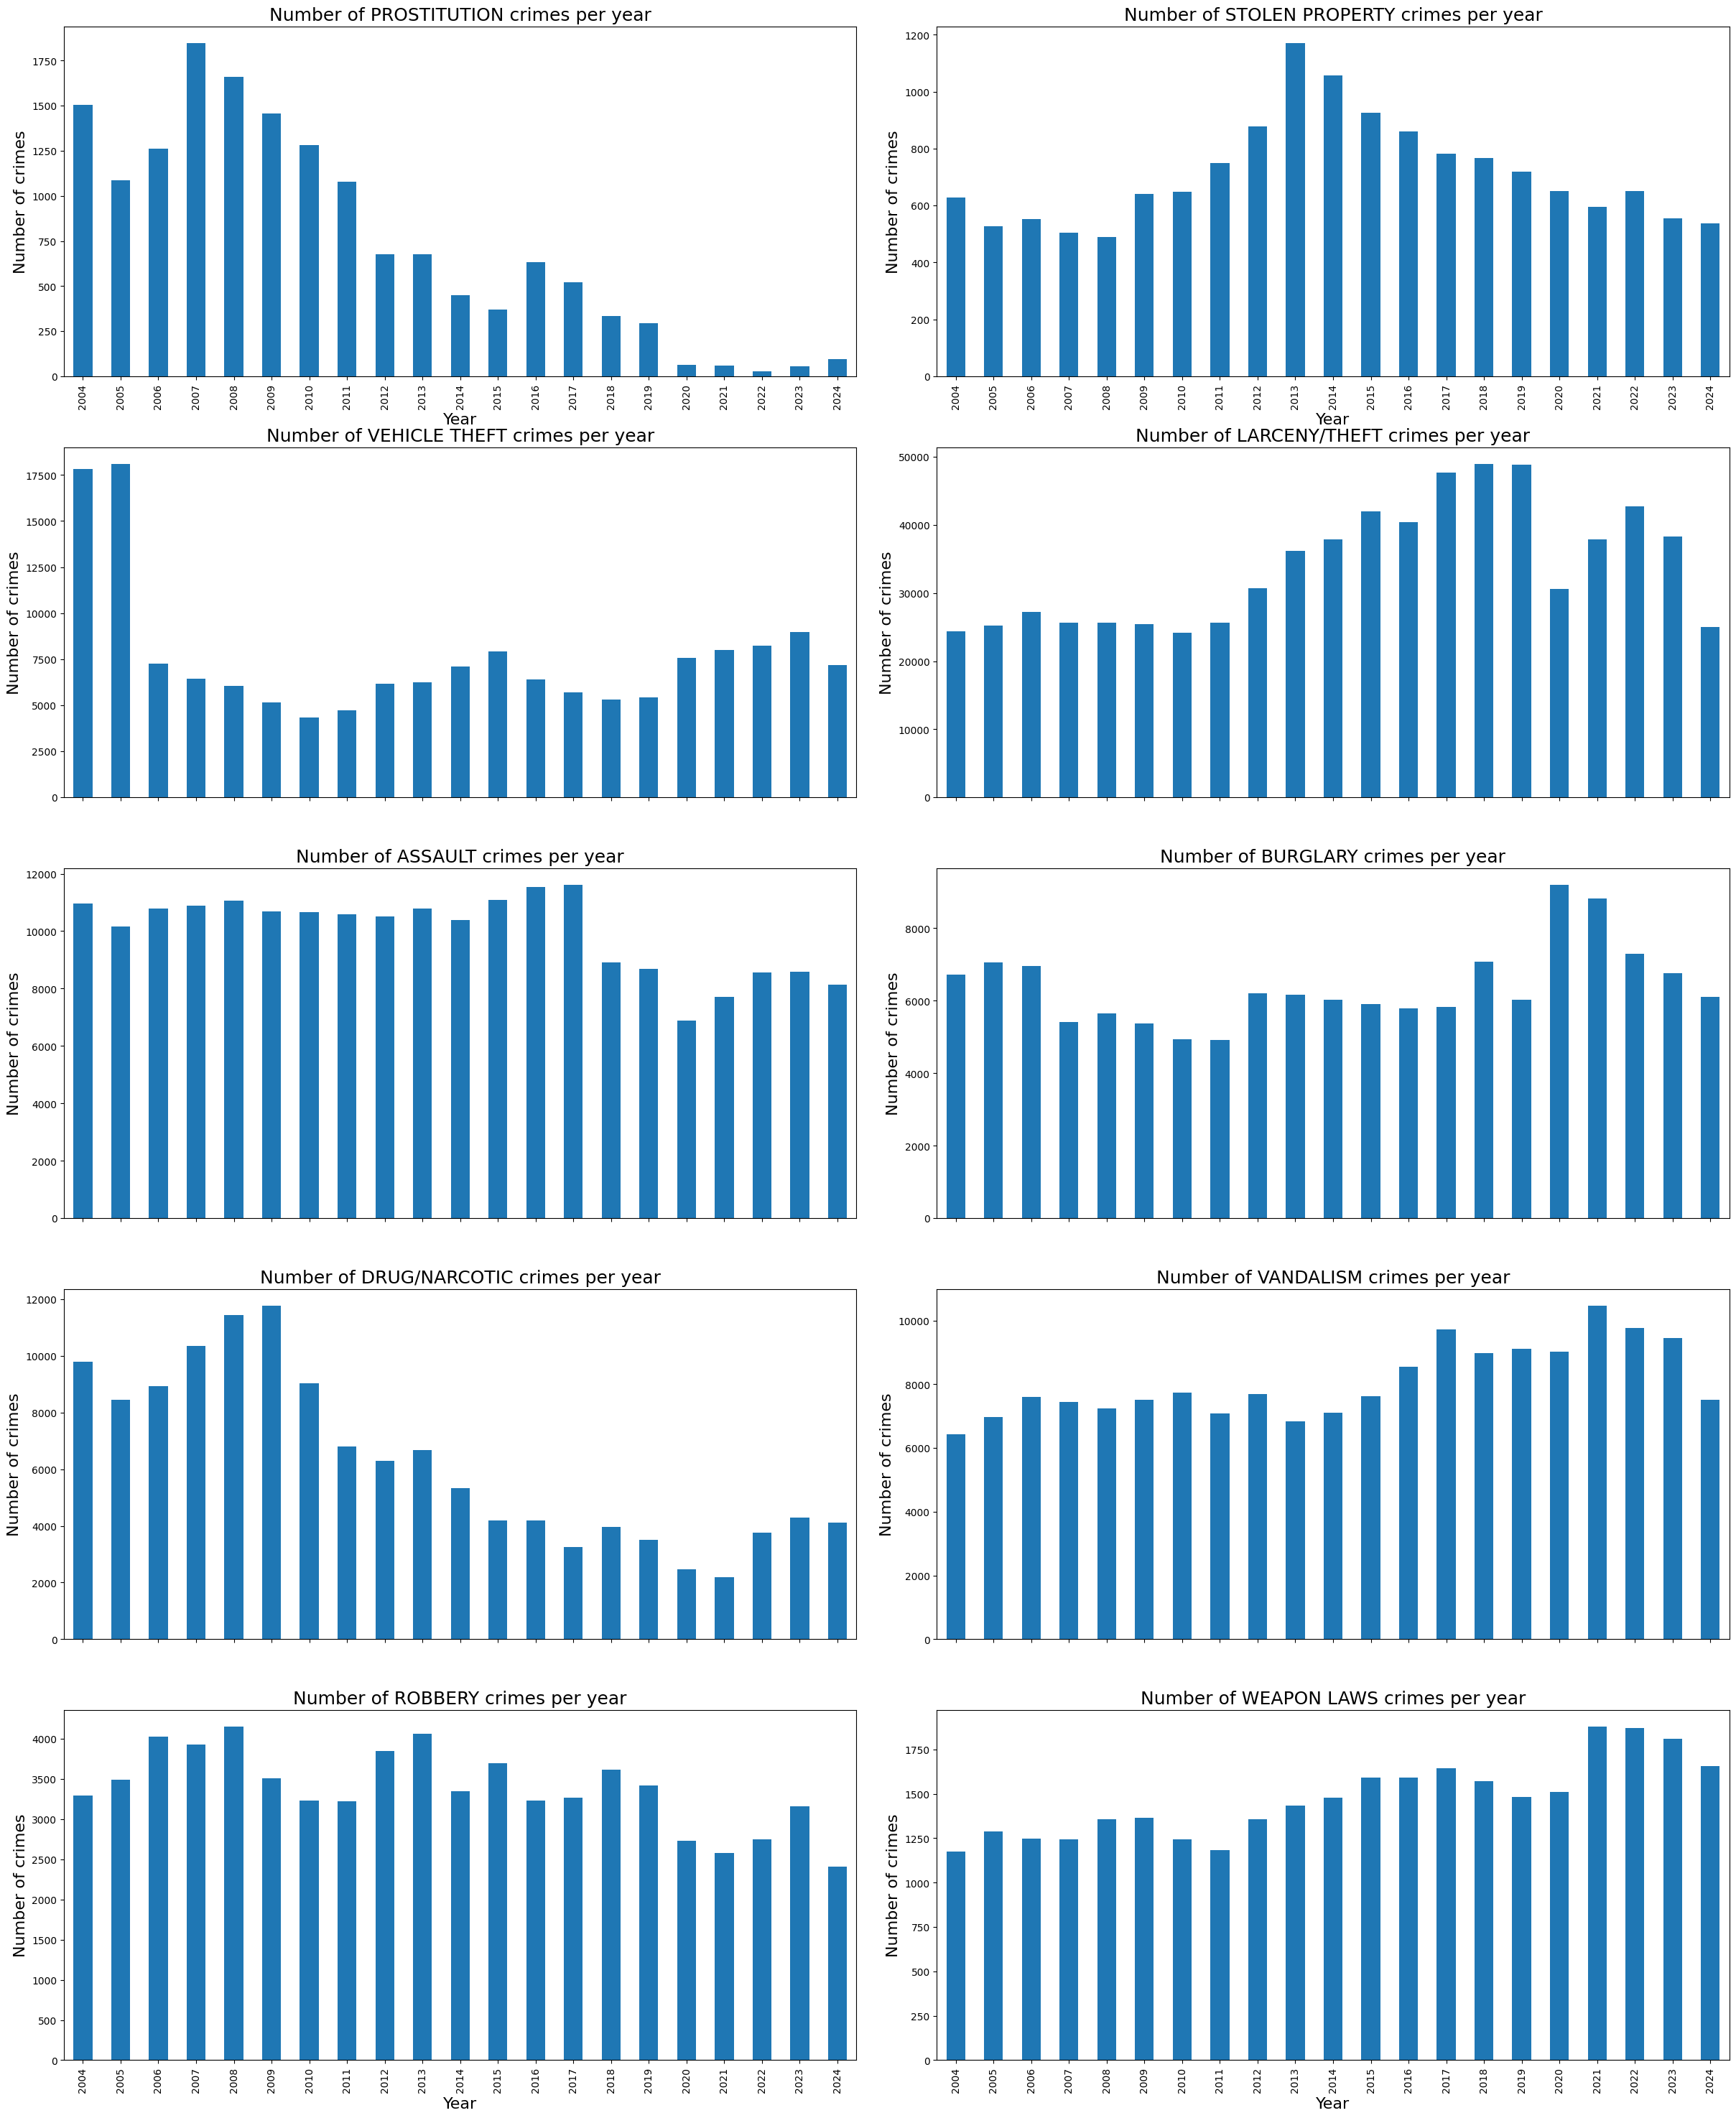

In [ ]:
# Creating a bar chart for each focus crime
fig, axs = plt.subplots(5, 2, figsize=(25, 30))
fig.tight_layout(pad=5.0)

for i, crime in enumerate(focuscrimes):
    row, col = i // 2, i % 2
    ax = axs[row, col]
    # Plot the bar chart for the crime category
    df[df['Category'] == crime]['Year'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title('Number of ' + crime + ' crimes by year', fontsize=18)
    ax.set_ylabel('Number of crimes', fontsize=16)
    
    # Only the subplots in the last and first row should display x-tick labels
    if row != 4 and row != 0:
        ax.tick_params(labelbottom=False)  # Hide x-tick labels
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Year', fontsize=16)  # Only last row gets an x-label

plt.show()

<span style="color:DodgerBlue">

> Comment on at least three interesting trends in your plot.

</span>

1) Some crimes seem to have seen drastic decrease in occurances. Especially **Drug/narcotics** and **Prostitution** have gone way down over the years.
For drug-related crime, this could be due to decriminilisation of cannabis or a shift in response to drugs (from criminal act to health-related incidents), but it's hard to tell without a proper analysis. The downwards trend of 2012 matches when medical cannabis became largely available to the population: https://www.statista.com/chart/30710/people-living-in-legal-weed-states/
 
2) It is interesting that the overall crime count does not follow the increasing population of USA, meaning that crime is decreasing (or at least the reports are).

3) Stolen Property sees a spike in 2012-2016, but by searching around we were not able to find a seemingly convincing cause for this. 

<span style="color:DodgerBlue">

## Part 2

> Answer questions related to the main video-lecture on Data Visualization.
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?

</span>

In the context of data for statistical data analysis, _Data_ are the measurements, numbers, text, etc. which we use to explain stuff. _Metadata_ is the contextual information about the data we are using.

_**Data**_: The longitude and latitude decimal values measured on a bike trip.

_**Metadata**_: The variables names and comments in the dataset file which help us understand what the values represent, e.g. `lon=123.456, lat=123.456`

A machine or a programme (Python for example) does not care about the representation of the metadata ("District" might as well be labeled "banana"), but it is very impotant to a data analysist or someone dechipering the data/result. 

<span style="color:DodgerBlue">

> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

</span>

Sune explains how our eyes collect the information in front of us, and then how we percieve it. He highlights the eye's capibility of seeing the bigger picture, whereas simple statistics might fail, be slow or be overly influenced by singular data points. This is clearly demonstrated in the previous execise in this notebook with the Anscombe's quartet. 

This goes both ways though, as humans can be easily tricked or can be biased, while programmes/machines/algorithms technically do exactly what you tell them to do.

In Sune's example, 1 vs 1000 can be presented visually in different way to convey the meaning. The magnitude of difference between data points can be hard to grasp conceptually, but if we manage to present it more visually aggresively, it can transmit the underlying information more clearly, e.g. the dots and the lines from Sune's examples. 

<span style="color:DodgerBlue">

> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

</span>
The Simpson's Paradox explains how aggregated data may show misleading trends. Underlying "sub-classifications" may reveal different trends or conclusions. 

To give an example, let's assume there is some data about DTU and ITU students applying for jobs.

At first glance, it looks like DTU has a higher acceptance rate:

| University | Applied | Got the job | Acceptance Rate |
|------------|---------|-------------|----------------|
| ITU        | 200     | 80          | **40%**        |
| DTU        | 200     | 100         | **50%**        |

It seems like **DTU is more likely to get hired**.

---

## Acceptance Rates by Field

However, by delving into what field they applied to, we get a different perspective:

| Department   | ITU Applied | ITU Accepted | ITU Acceptance Rate | DTU Applied | DTU Accepted | DTU Acceptance Rate |
|-------------|------------|-------------|-----------------|------------|-------------|-----------------|
| Gaming | 100        | 20          | **20%**         | 10         | 5           | **50%**         |
| Engineering    | 100        | 60          | **60%**         | 190        | 95          | **50%**         |

### What’s Happening?  
- **ITU applicants mostly applied to Gaming** which had **lower acceptance rates overall**.  
- **DTU applicants mostly applied to Engineering** which had **higher acceptance rates overall**.  
- **Within each field, ITU had a higher or equal acceptance rate**  

### The initial conclusion was wrong  
While the overall numbers suggest **DTU students are more likely to get hired**, the detailed breakdown shows that **ITU students actually have higher acceptance rates** — but most of their applicants went for the harder-to-get-in Gaming-related jobs.  

<span style="color:DodgerBlue">

> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.

</span>

_**Exploratory Data Analysis**_ is when we are looking to test or explore a hypothesis or looking for mmeaning within a dataset.

_**Explanatory Data Analysis**_ is when we are aware of trends within a dataset and want to convey this information to others.



> Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.

**Rule 1 - _Subplots_:** 
* If we need to show multiple (similar) plots regarding the same problem or data, we should strongly consider using subplots. 

**Rule 2 - _Crop tightly_:** 
* When presenting plots in a paper, it is important to zoom it tighly, reducing redundant spacing. 

**Rule 3 - _Labels_:** 
* "Plots with no labels will get you fired!" - It is important to show the reader what the data is, i.e. think of it as providing neccessary metadata for context. 

**Rule 4 - _Axes 1 Meaningful values_:** 
* The axes tick intervals and values should intuitivly make sense, e.g. intervals of 7 for days to associate with weeks.

**Rule 5 - _Axes 2 Truthful limits_:** 
* The axes should not leave out information in order to show trends, e.g. zooming in on the y-axis in order to show differences, when these in reality are miniscule.

**Rule 6 - _Axes 3 Subplot limits_:** 
* The axes limits of subplots should not differ if compared directly, e.g. when working with quantities and not concentrations.

**Rule 7 - _Data to Ink ratio 1_:** 
* The amount of the total ink used to present data should be maximized: _Keep it simple and straight to the point_! 

**Rule 8 - _Data to Ink ratio 2_:** 
* Redundent visualisation should be removed to highlight the important parts of the data; _Less is more_!

**Rule 9 - _Fonts_:** 
* Changing the font is just an example of showing attention to detail. Be thoughtful with how you present your findings.

**Rule 10 - _Captions_:** 
* Captions are very useful to convey information alongside visualizations. A good caption will explain each component of the graphic and clearing up any potential confusion.

## Part 3

> We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "Exercise: Other cool ways to plot temporal data".
> 
> In the exercise, I ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.

First, we are going to make a calendar plot based on the vandalism data:

In [23]:
# Additional imports for part 3 
import calplot
import numpy as np
import matplotlib.colors as mcolors

C:\Users\Dreun\AppData\Local\Temp\ipykernel_29112\338507395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus.loc[:, 'Date'] = pd.to_datetime(df_focus[['Year', 'Month', 'Day']])
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helv

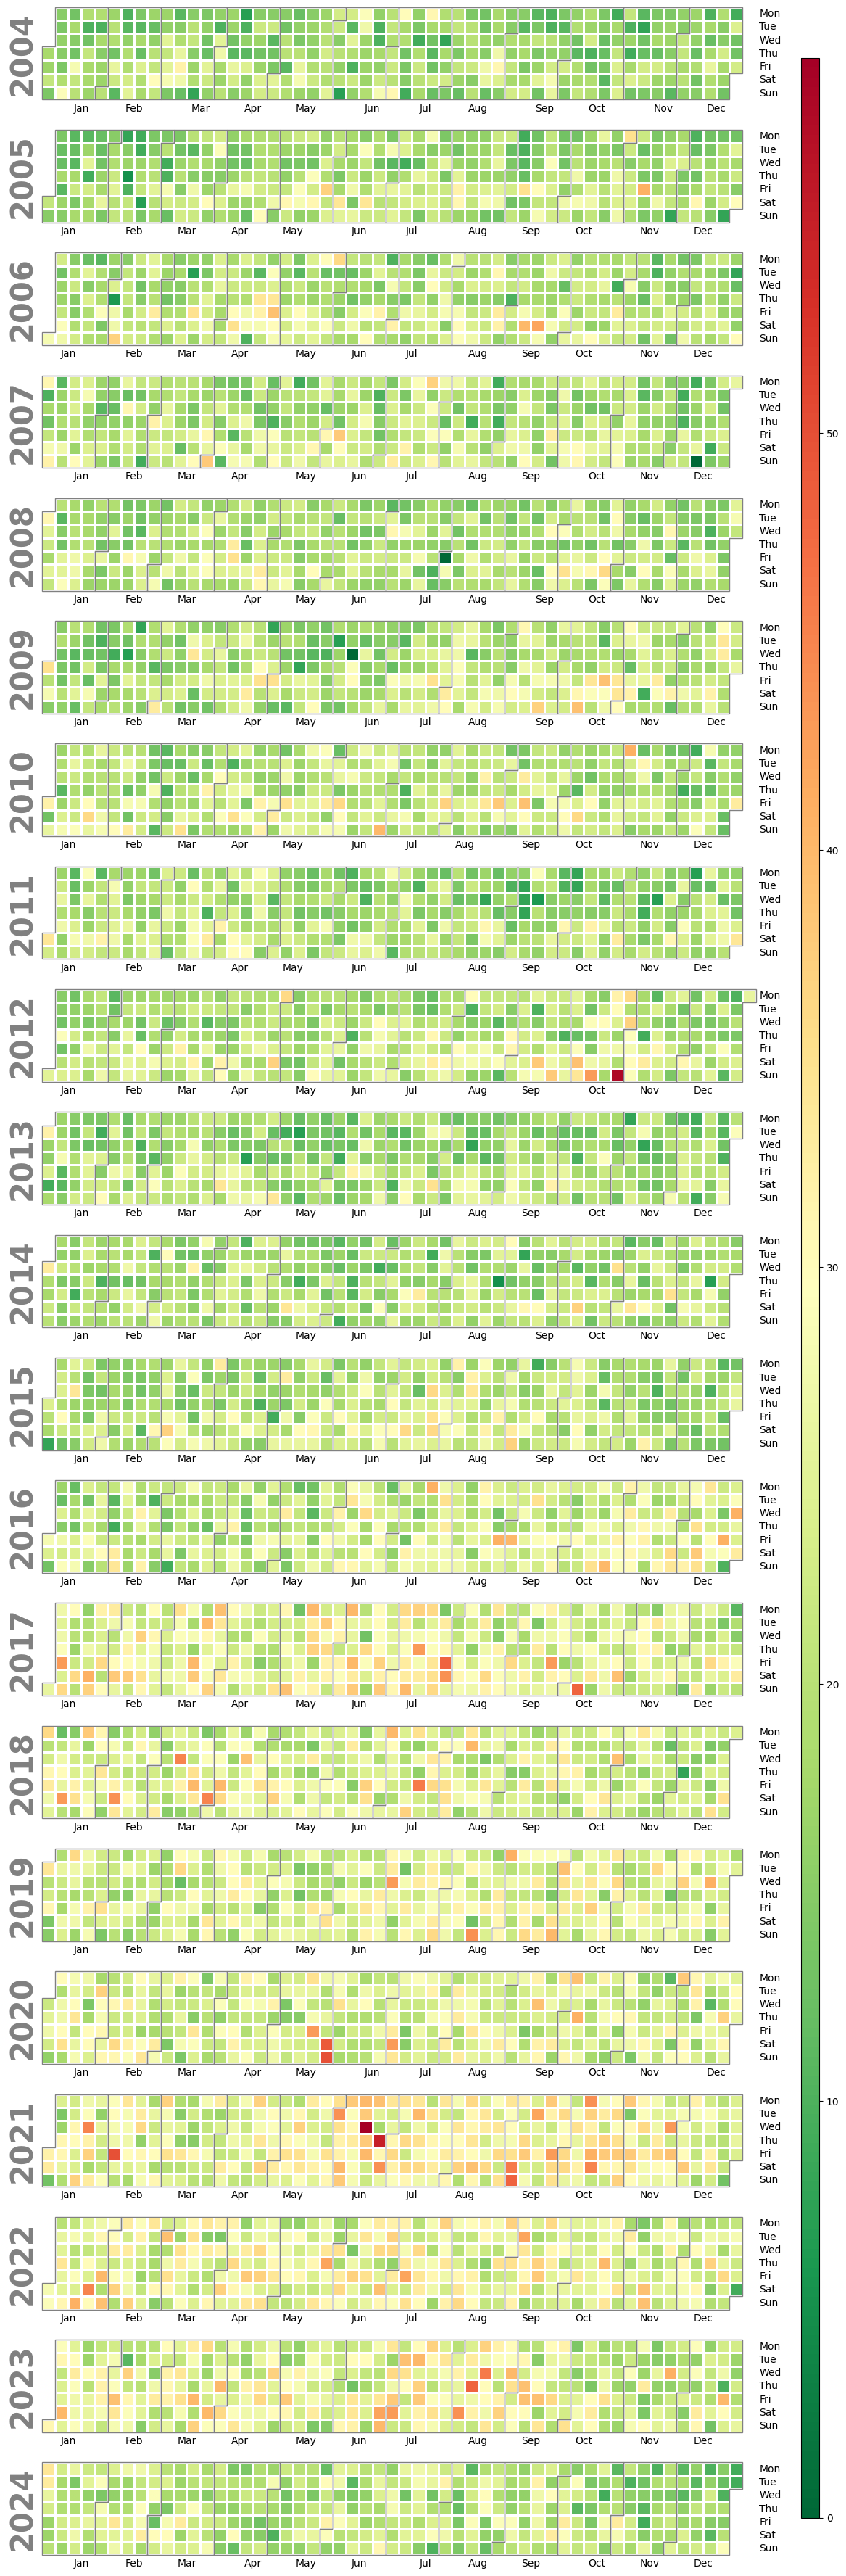

In [24]:
# Combine Day, Month, and Year columns to create a Date column
df_focus.loc[:, 'Date'] = pd.to_datetime(df_focus[['Year', 'Month', 'Day']])

# Filter the DataFrame for vandalism crimes
vandalism_crimes = df_focus[df_focus['Category'] == 'VANDALISM']

# Group by date and count occurrences
vandalism_crimes_count = vandalism_crimes.groupby(vandalism_crimes['Date']).size()

# Create colormap from green to red (few to many incidents)
cmap_orig = plt.colormaps['RdYlGn']
cmap_reversed = cmap_orig.reversed()

# Plot the calendar heatmap
calplot.calplot(
    data=vandalism_crimes_count, 
    cmap=cmap_reversed, 
    fillcolor="Blue",
    colorbar=True,
)
plt.show()

Then we will make a polar bar chart based on the vehicle theft data:

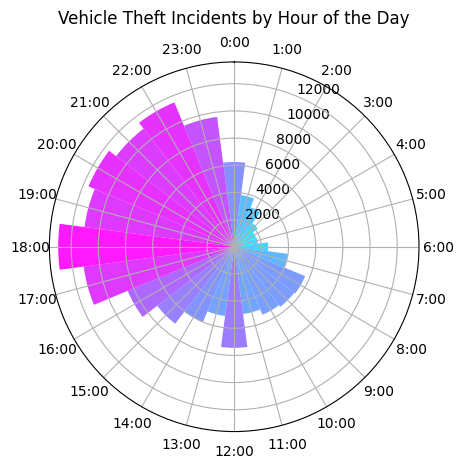

In [25]:
# Filter the DataFrame for vehicle theft crimes
theft_data = df_focus[df_focus['Category'] == 'VEHICLE THEFT']

# Group by hour and count occurrences
hourly_counts = theft_data.groupby('Hour').size()
hourly_counts = hourly_counts.reindex(range(24), fill_value=0)

# Compute theta and radii
theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)
radii = hourly_counts.values
width = 2 * np.pi / 24  

# Create the polar bar chart
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
bars = ax.bar(theta, radii, width=width, bottom=0.0, color=plt.cm.cool(radii / radii.max()), alpha=0.9)
ax.set_xticks(theta)
ax.set_xticklabels([f'{i}:00' for i in range(24)])
plt.title('Vehicle Theft Incidents by Hour of the Day', va='bottom')

plt.show()


## Part 4

> From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to both complete "Excercise Part 1: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "Excercise Part 2". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.

First, we will recreate Figure 2-1 from DAOST by making a dot and jitter plot displaying the vandalism crimes from January until June 2010 from 3:00 - 3:59 a.m.:

In [26]:
# Additional imports for part 4
import seaborn as sns
from scipy import stats

Crimes at 3-4 a.m. during the first half year of 2010:  113


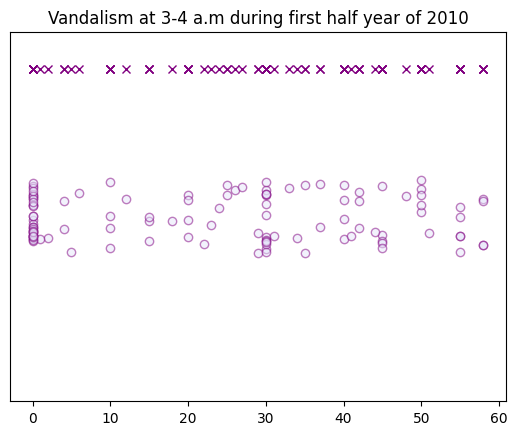

In [34]:
# Filter the DataFrame for vandalism crimes
vandalism_crimes = df_focus[df_focus['Category'] == 'VANDALISM']

# Filtering for Jan - June 2010, 3:00-3:59 am
vandalism_selected = vandalism_crimes[
    (vandalism_crimes['Year'] == 2010) &
    (vandalism_crimes['Month'].between(1, 6)) &
    (vandalism_crimes['Hour'] == 3)
]

print(f"Crimes at 3-4 a.m. during the first half year of 2010: ",len(vandalism_selected))

# Jitter each point by adding a random number between -0.02 and 0.02
y = np.zeros_like(vandalism_selected['Minute'], dtype=float)
y += np.random.uniform(-0.02,0.02, vandalism_selected['Minute'].shape)

# Dott and Jitter plot combined 
plt.figure()
plt.plot(vandalism_selected['Minute'], np.zeros_like(vandalism_selected['Minute']) + 0.08, 'x', color='purple')
plt.scatter(vandalism_selected['Minute'], y, alpha=0.5, color='lavender', edgecolor='purple')
plt.ylim(-0.1, 0.1)
plt.yticks([])
plt.title("Vandalism at 3-4 a.m during first half year of 2010")
plt.show()

Next, we will recreate Figure 2-2 from DAOST by plotting the GPS data of the vehicle theft and drug/narcotic crimes in 2015 in histograms:

Prostitution data points: 7935
Drug/Narcotic data points: 4194


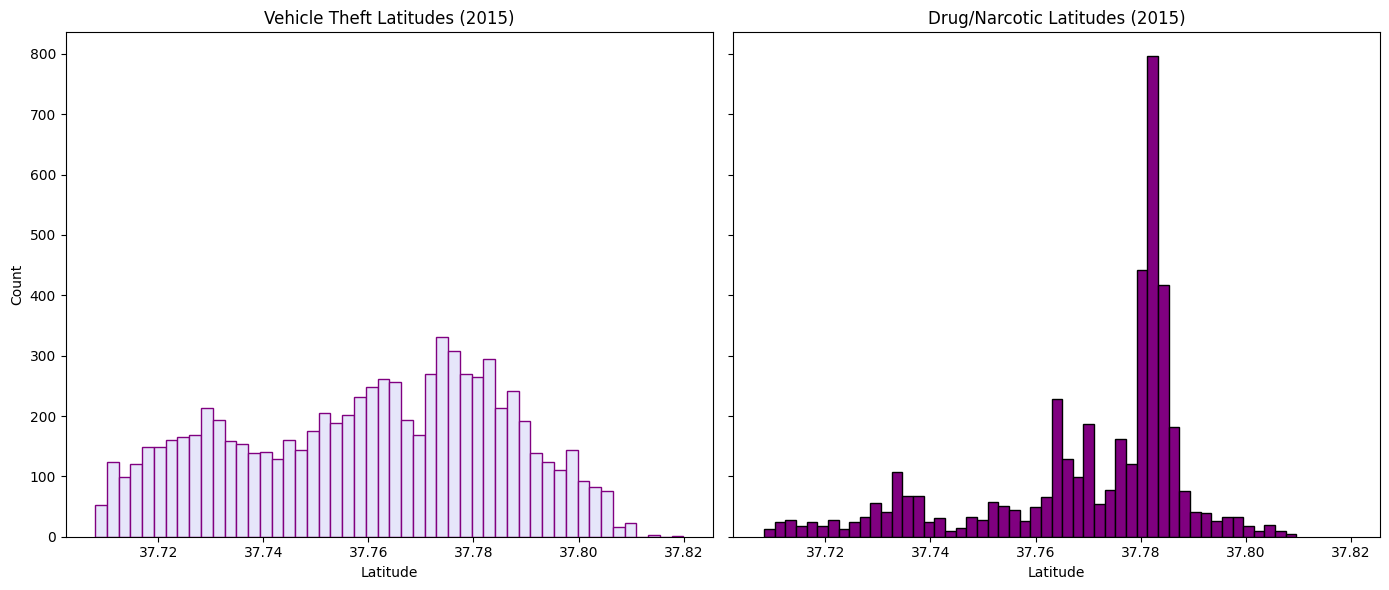

In [28]:
# Filter for the year 2015
df_interval = df_focus[(df_focus['Year'] == 2015)]

# Choose the crimes "VEHICLE THEFT" and "DRUG/NARCOTIC" 
vehicle_crimes = df_interval[df_interval['Category'] == 'VEHICLE THEFT']
drug_crimes = df_interval[df_interval['Category'] == 'DRUG/NARCOTIC']

# Print the number of data points for each crime
print("Prostitution data points:", len(vehicle_crimes))
print("Drug/Narcotic data points:", len(drug_crimes))

# Extract the latitude for each crime (assumed to be in the "Latitude (Y)" column)
lat_vehicle = vehicle_crimes["Latitude (Y)"].dropna()
lat_drug = drug_crimes["Latitude (Y)"].dropna()

# Bin the latitudes into ~50 bins using numpy.histogram
counts_pro, bin_edges_pro = np.histogram(lat_vehicle, bins=50)
counts_van, bin_edges_van = np.histogram(lat_drug, bins=50)

# Plot the histograms side by side with shared x and y axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot for Vehicle theft crimes
axes[0].bar(bin_edges_pro[:-1], counts_pro, 
            width=(bin_edges_pro[1]-bin_edges_pro[0]), 
            align='edge', color='lavender', edgecolor='purple')
axes[0].set_title("Vehicle Theft Latitudes (2015)")
axes[0].set_xlabel("Latitude")
axes[0].set_ylabel("Count")

# Plot for Drug/Narcotic crimes
axes[1].bar(bin_edges_van[:-1], counts_van, 
            width=(bin_edges_van[1]-bin_edges_van[0]), 
            align='edge', color='purple', edgecolor='black')
axes[1].set_title("Drug/Narcotic Latitudes (2015)")
axes[1].set_xlabel("Latitude")

plt.tight_layout()
plt.show()

To recreate Figure 2-4 from DAOST, we plot the data displaying the vandalism crimes from January until June 2010 from 3:00 - 3:59 a.m. as a histogram with a kernel density estimate (KDE) of the distribution: 

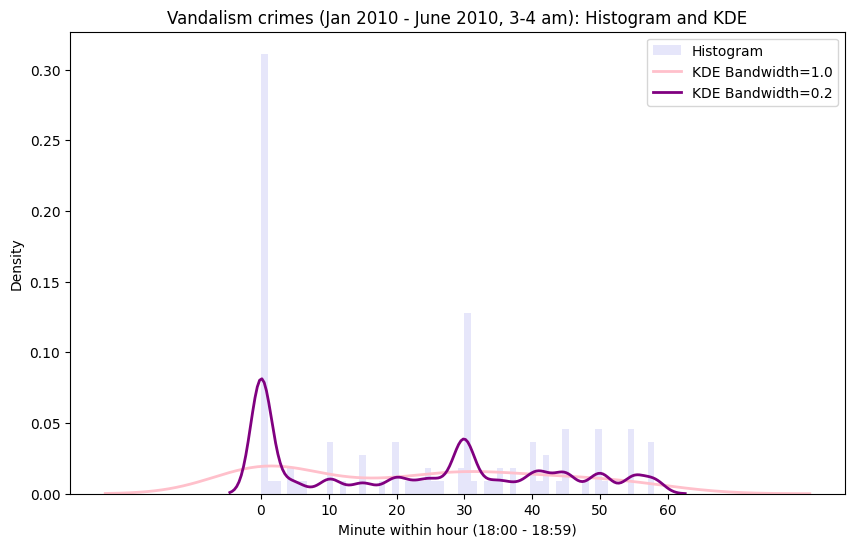

In [29]:
# Create kernel density plots using pandas based strategy
plt.figure(figsize=(10, 6))

# Plot the histogram as striped lines
plt.hist(vandalism_selected['Minute'], bins=60, density=True, 
         color='lavender', linewidth=1.5, label='Histogram')

# KDE with bandwidth adjustment of 1
sns.kdeplot(vandalism_selected['Minute'], bw_adjust=1, label="KDE Bandwidth=1.0",
            color='pink', linewidth=2)

# KDE with bandwidth adjustment of 0.2
sns.kdeplot(vandalism_selected['Minute'], bw_adjust=0.2, label="KDE Bandwidth=0.2",
            color='purple', linewidth=2)

plt.xlabel('Minute within hour (18:00 - 18:59)')
plt.title('Vandalism crimes (Jan 2010 - June 2010, 3-4 am): Histogram and KDE')
plt.xticks(np.arange(0, 61, 10))
plt.legend()
plt.show()


Next, we will choose 25 random timepoints from the same dataset again as a histogram with a KDE:

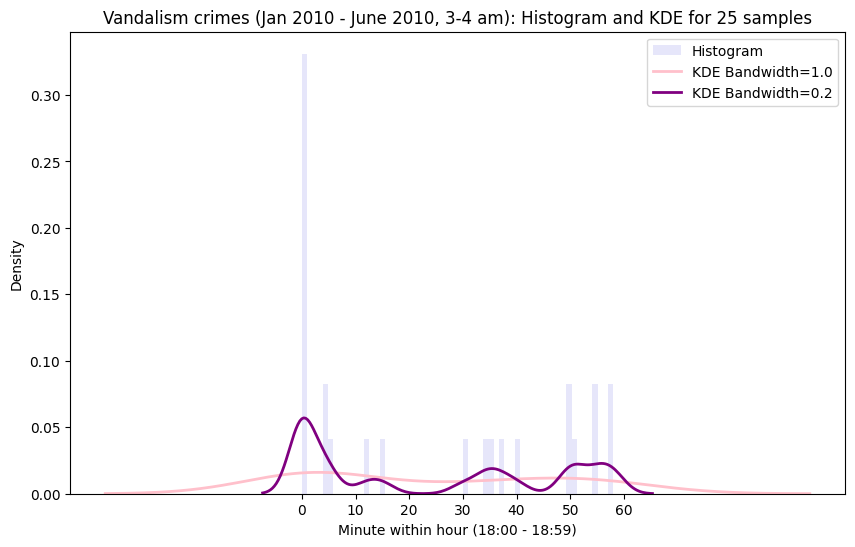

In [30]:
# Taking 25 random timepoints from the dataset (originally: 113)
vandalism_selected_sample = vandalism_selected.sample(25, random_state=1)

# Create kernel density plots using pandas based strategy
plt.figure(figsize=(10, 6))

# Plot the histogram as striped lines
plt.hist(vandalism_selected_sample['Minute'], bins=60, density=True, 
         color='lavender', linewidth=1.5, label='Histogram')

# KDE with bandwidth adjustment of 1
sns.kdeplot(vandalism_selected_sample['Minute'], bw_adjust=1, label="KDE Bandwidth=1.0",
            color='pink', linewidth=2)

# KDE with bandwidth adjustment of 0.2
sns.kdeplot(vandalism_selected_sample['Minute'], bw_adjust=0.2, label="KDE Bandwidth=0.2",
            color='purple', linewidth=2)

plt.xlabel('Minute within hour (18:00 - 18:59)')
plt.title('Vandalism crimes (Jan 2010 - June 2010, 3-4 am): Histogram and KDE for 25 samples')
plt.xticks(np.arange(0, 61, 10))
plt.legend()
plt.show()


To recreate Figure 2-11 with the GPS data of the vehicle theft and drug/narcotic crimes in 2015, we make a probability density plot:

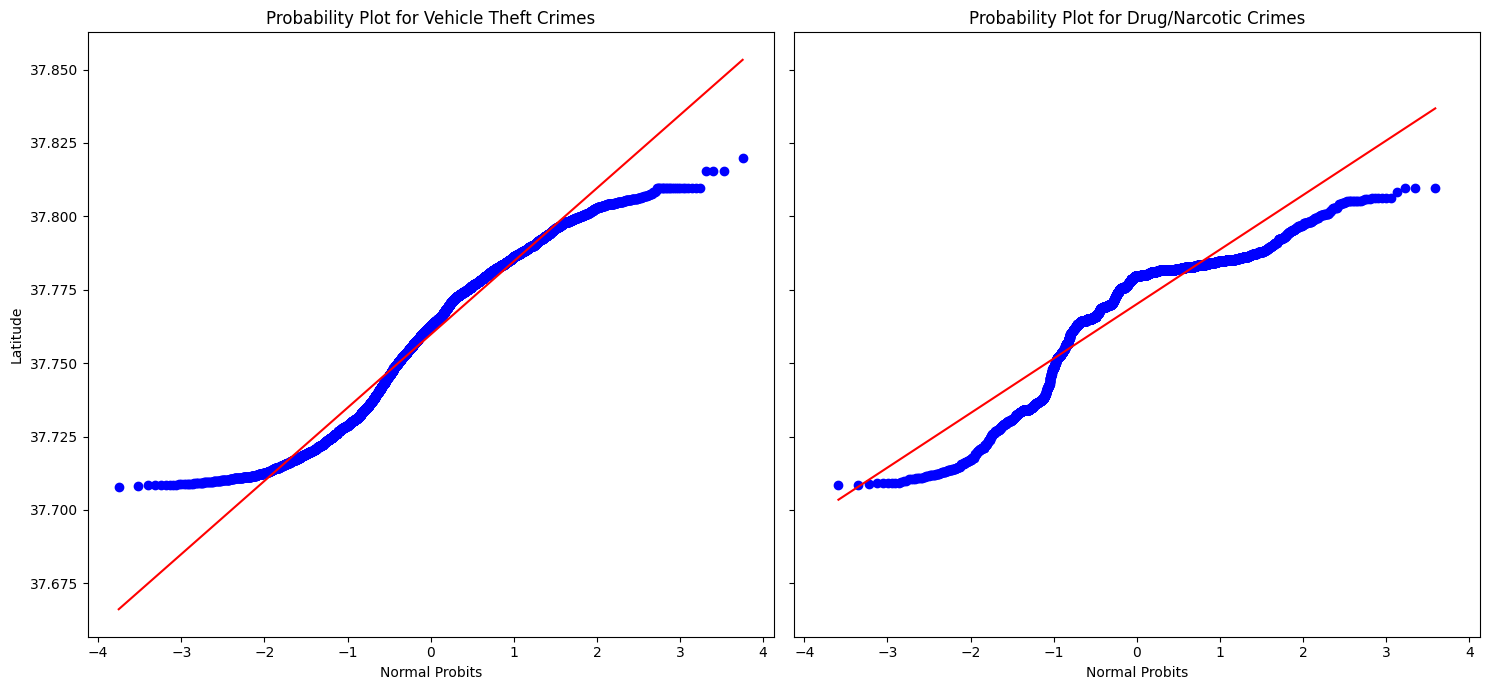

In [31]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True, sharex=True)

# QQ plot for vehicle theft crimes
stats.probplot(lat_vehicle, dist="norm", plot=axes[0])
axes[0].set_title('Probability Plot for Vehicle Theft Crimes')
axes[0].set_ylabel("Latitude")
axes[0].set_xlabel("Normal Probits")

# QQ plot for drug/narcotic crimes
stats.probplot(lat_drug, dist="norm", plot=axes[1])
axes[1].set_title('Probability Plot for Drug/Narcotic Crimes')
axes[1].set_xlabel("Normal Probits")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


> Comment on the result. 

1) Vehicle theft: Seems to follow the normal distrubution quite well, meaning that position has little bearing on the vehicle theft rate. 

2) Drug/narcotic: Here we see some greater deviations which points to position having an influence on this type of crim (They do not follow a normal distribution).

Lastly, we will make box plots that show the number of crimes per day for the full time-span of the data for all focus crimes:

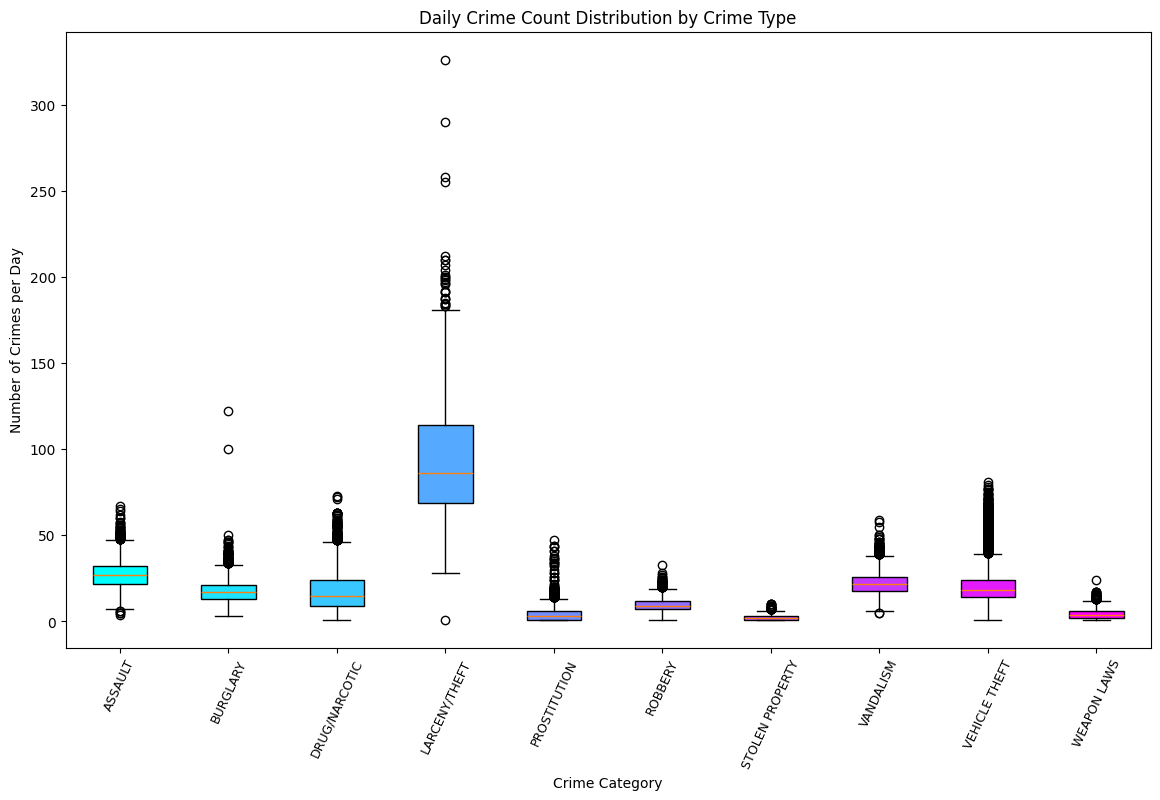

In [32]:
# Group by Category and Date to count crimes per day for each category
daily_counts = df_focus.groupby(['Category', 'Date']).size().reset_index(name='Count')

# For each category, extract the array of daily crime counts
categories = sorted(daily_counts['Category'].unique())
data_to_plot = [daily_counts[daily_counts['Category'] == cat]['Count'].values for cat in categories]

# Create the box-and-whiskers plot using matplotlib's built-in functionality
plt.figure(figsize=(14, 8))
box = plt.boxplot(data_to_plot, tick_labels=categories, patch_artist=True)

colors = plt.cm.cool(np.linspace(0, 1, len(categories)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(size=9, rotation=65)
plt.xlabel('Crime Category')
plt.ylabel('Number of Crimes per Day')
plt.title('Daily Crime Count Distribution by Crime Type')
plt.show()


> What does this plot reveal that you can't see in the plots from last time?

And to create box-plots for an overview of when various crimes occur, we plot the average time-of-day that a crime takes place:

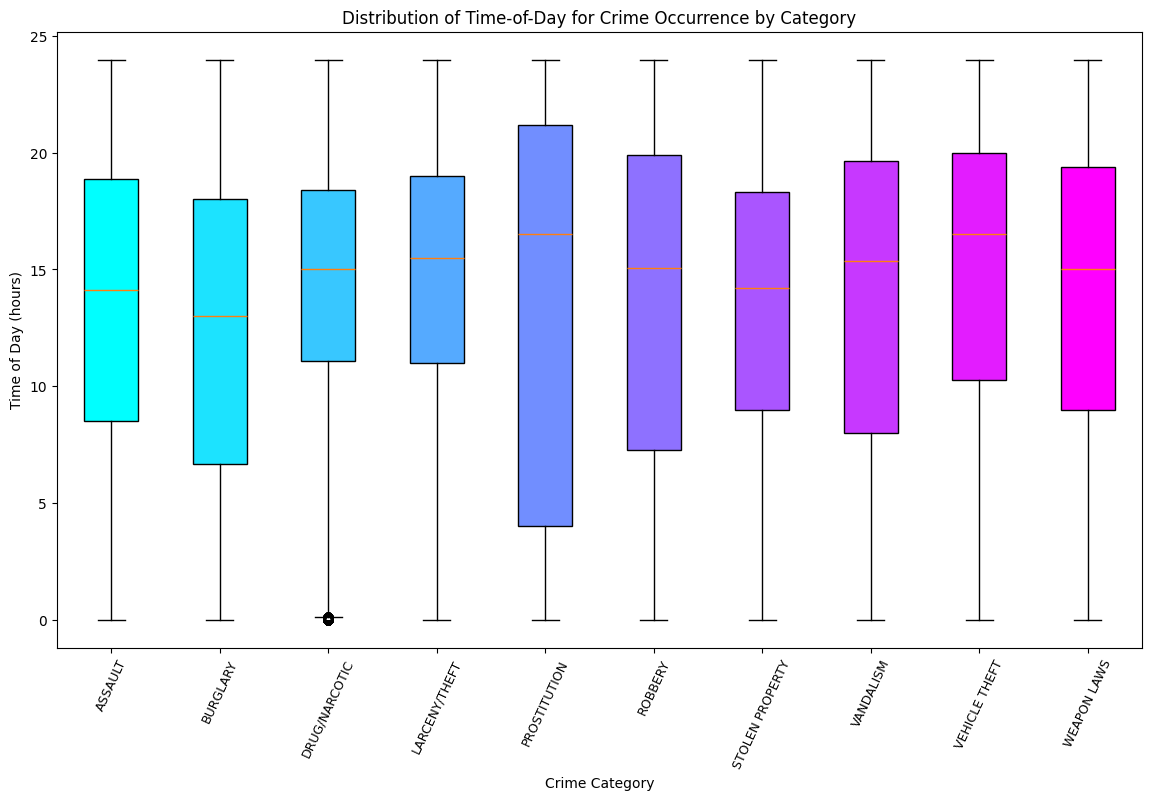

In [33]:
# Create a new column 'TimeOfDay' that converts Hour and Minute to a decimal value
df_focus = df_focus.copy()
df_focus['TimeOfDay'] = df_focus['Hour'] + df_focus['Minute'] / 60.0

# For each crime category, collect the TimeOfDay values
categories = sorted(df_focus['Category'].unique())
data_to_plot = [df_focus[df_focus['Category'] == cat]['TimeOfDay'].values for cat in categories]

# Create one big figure with box plots for each crime category
plt.figure(figsize=(14, 8))
box = plt.boxplot(data_to_plot, tick_labels=categories, patch_artist=True, showfliers=True)

# Optionally, customize the color for each box using a colormap for better distinction
colors = plt.cm.cool(np.linspace(0, 1, len(categories)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel("Crime Category")
plt.ylabel("Time of Day (hours)")
plt.title("Distribution of Time-of-Day for Crime Occurrence by Category")
plt.xticks(size=9, rotation=65)
plt.show()

## Part 5

> Finally, I'd like you to work on the exercise "Exercise: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3.

## Contributions:

"Remember to write a final section at the end of the report specifying the contributions of the various group members."